## Homework 2 Part 2 Task 1: PCA
We will use the Fashion-MNIST dataset to build a PCA model. <br>
https://github.com/zalandoresearch/fashion-mnist <br>
Then, we will use the PCA model to <br>
(1) visualize the data in 2D <br>
(2) generate new images as a generative model <br>
This is a guided-task: <br>
You will see the output of a code cell and then figure out the code in that cell. <br>
In each code cell, there are instructions to help you. <br>
This is a very efficient and effective way to learn how to program with sk-learn

#### First, we load the dataset

In [24]:
# load the data, and it may take a while
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

In [25]:
data=fasion_mnist.data
images=data.reshape(-1,28,28)
target=fasion_mnist.target.astype('int64')

In [26]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
data.shape

(70000, 784)

In [27]:
# images[0] is the first image (28x28)
images.shape

(70000, 28, 28)

In [28]:
#an element in target is the class label of the corresponding image in data
target.shape

(70000,)

In [29]:
[target.min(), target.max()]

[0, 9]

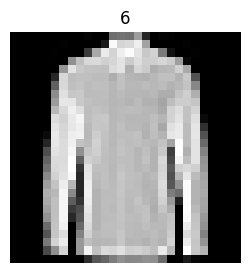

<Figure size 640x480 with 0 Axes>

In [30]:
# show some of the images
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, target.shape[0], 1000):
    x=data[n,:]
    x=x.reshape(28,28) # reshape a vector to an image
    ax.imshow(x, cmap='gray')    
    ax.axis('off')
    ax.set_title(target[n])
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1)  

#### we need the function plot_components for visualization

In [31]:
from matplotlib import offsetbox
import numpy as np
def plot_components(data, model, images, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Your work begins here

In [32]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#it runs faster to get the eigenvectors and eigenvalues
#it is more memory efficient
from sklearn.decomposition import IncrementalPCA
pca = IncrementalPCA(n_components=2,  whiten=False)
#the function 'fit' computes eigenvectors and eigenvalues
#use 'fit_transform' to do fit and forward transform together
data_new = pca.fit_transform(data)

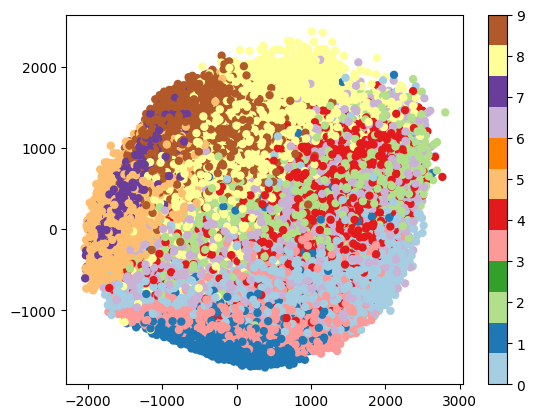

In [33]:
#show the data points in 2D
#you can find example code in my lecture notes (notebook files)
#you need to create a figure and axis:  fig, ax = plt.suplots()
#plt.scatter(data_new[:, 0], data_new[:, 1], c=target, edgecolor='none', cmap='Paired')
#plt.colorbar()
fig, ax = plt.subplots()
scat = ax.scatter(data_new[:, 0], data_new[:, 1], c=target, edgecolor='none', cmap='Paired')
fig.colorbar(scat)

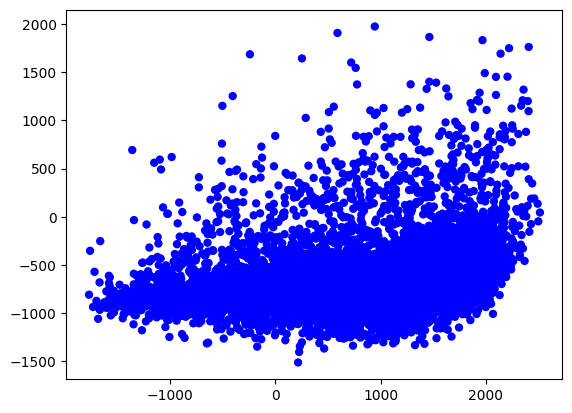

In [34]:
#show only the data points/images with class label=0 (i.e. target is 0) in 2D
fig, ax = plt.subplots()
scat = ax.scatter(data_new[target == 0, 0], data_new[target == 0, 1], c='blue', edgecolor='none')

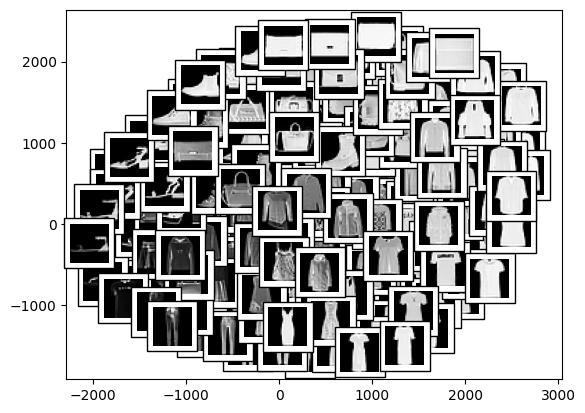

In [35]:
# use plot_components to show the data points
# the parameter 'model' of plot_components refers to the pca model
plot_components(data_new, pca, images)


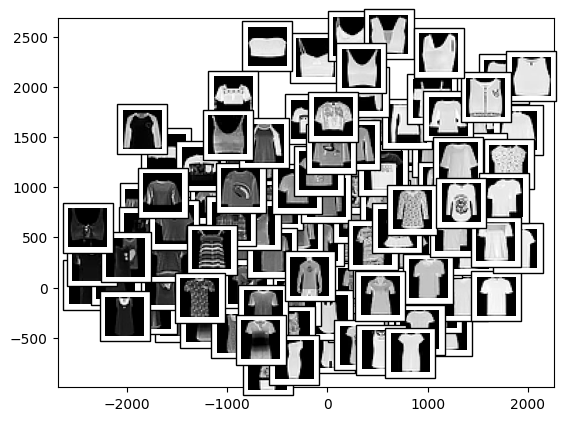

In [36]:
# use plot_components to show the data points with class label=0
# you may need something like this: data[target==0], images[target==0]
plot_components(data_new[target == 0], pca, images[target == 0])

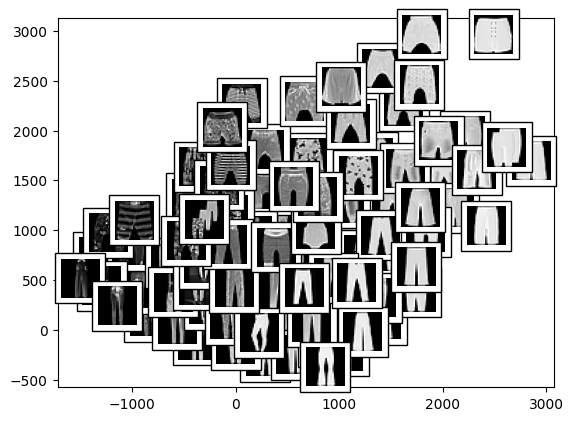

In [37]:
# use plot_components to show the data points with class label=1
# you may need something like this: data[target==1], images[target==1]
plot_components(data_new[target == 1], pca, images[target == 1])

From the above examples, we can see that PCA can extract meaningful features from the images 

### 2. Use PCA to generate new images 

First, we need to figure out how many components we need

In [38]:
#use IncrementalPCA (instead of original PCA) in sk-learn
#set n_components to a large number, e.g, 100
pca = IncrementalPCA(n_components=100, whiten=False).fit(data)
Beta = pca.transform(data)
X_app = pca.inverse_transform(Beta)

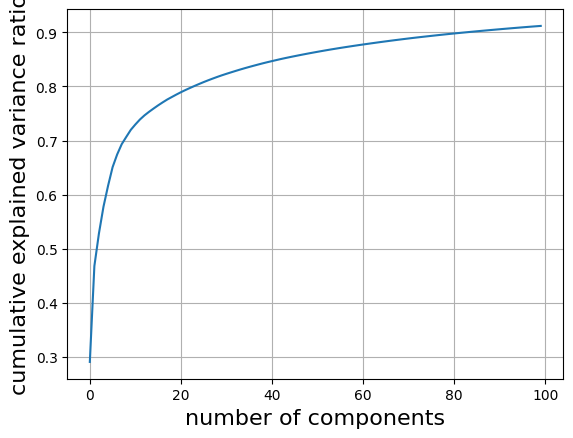

In [39]:
#plot the curve of 'percentage of variance explained' (0~1) vs n_components (0~100)
#apply np.cumsum on explained_variance_ratio_
# use plt.grid() to show grid
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components', fontsize=16)
plt.ylabel('cumulative explained variance ratio', fontsize=16)
plt.grid()

In [40]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

var_ratios = np.cumsum(pca.explained_variance_ratio_)
# find the smallest value of n_component such that 
# (1) average reconstruction error is <= 20%
# (2) percentage of variance explained is >= 80%
# (3) cumulative explained variance ratio >= 80%
# (1), (2) and (3) are essentially the same
# you do not need to re-fit the model using this new value of n_component
best = 0
for i in range(100):
    if var_ratios[i] > 0.8:
        best = i
        break
print('best = ', best)

best =  23


In [41]:
# get the mean, eigenvalues, and eigenvectors from the pca model
# assume that:
# the name of mean is mu
mu = pca.mean_
# the name of eigenvalues is v (a 1D array)
v = pca.explained_variance_
# the name of eigenvectors is w (a 2D array)
w = pca.components_

In [42]:
v.shape

(100,)

In [43]:
w.shape

(100, 784)

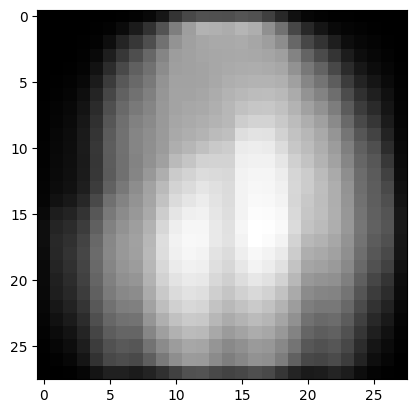

In [44]:
# plot the mean image from pca
# you need to reshape it to 28x28
plt.imshow(mu.reshape(28,28), cmap='gray')

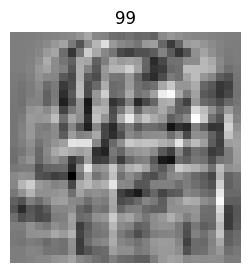

<Figure size 640x480 with 0 Axes>

In [45]:
# use a for loop to show the images of eigenvectors
# image is w[n].reshape(28,28)
# sample code:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, 100):
    ax.imshow(w[n].reshape(28,28), cmap='gray')    
    ax.axis('off')
    ax.set_title(n)
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2) 


In [46]:
# L2 norm of an eigenvector w[0]
np.sum(w[0]**2)

1.0000000000000013

In [47]:
# generate a random number
3*np.random.randn()

0.03475533173071118

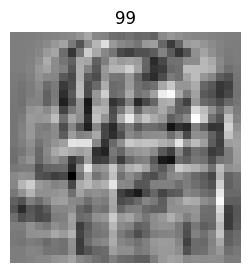

<Figure size 640x480 with 0 Axes>

In [48]:
# generate and show the new images
# use a for loop to geneate 100 new images
#     inside the for loop
#     x_new = mu + y[0]*sqrt(v[0])*w[0]+...+y[K]*sqrt(v[K])*w[K]
#     use a for loop to get X_new using the above equation
#     K is the number of components
#     y[k] is a random number generated using 3*np.random.randn()
from math import sqrt

fig, ax = plt.subplots(figsize=(3, 3))
for n in range(100):
    x_new = mu
    for k in range(len(w)):
        x_new += 3*np.random.randn()*sqrt(v[k])*w[k]
    ax.imshow(w[n].reshape(28,28), cmap='gray')    
    ax.axis('off')
    ax.set_title(n)
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.2) 


PCA is not good at generating images. <br>
There is a better method based on neural networks.

### t-SNE for visualization

In [86]:
#select a subset of data points for TSNE
#because TSNE is very time-consuming
data_s=data[0::100]
target_s=target[0::100]
images_s=images[0::100]

/var/folders/sm/92mf27fs2n95bg1t7lkr0hwr0000gn/T/ipykernel_6421/2767617037.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colorize = dict(c=target_s, cmap=plt.cm.get_cmap('rainbow', 9), marker='.')


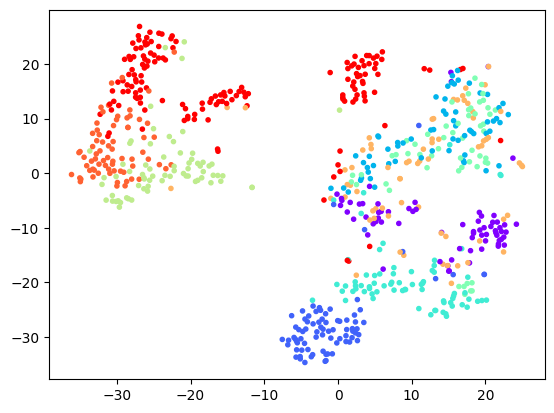

In [97]:
# run t-SNE on data_s and visualize the data in 2D using scatter plot
from sklearn.manifold import TSNE
colorize = dict(c=target_s, cmap=plt.cm.get_cmap('rainbow', 9), marker='.')
model = TSNE(n_components=2)
out = model.fit_transform(data_s)
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)